C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_4648\3969033263.py:21: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  kategorical_features = train[less].select_dtypes(include=['object']).columns
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_4648\3969033263.py:42: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas

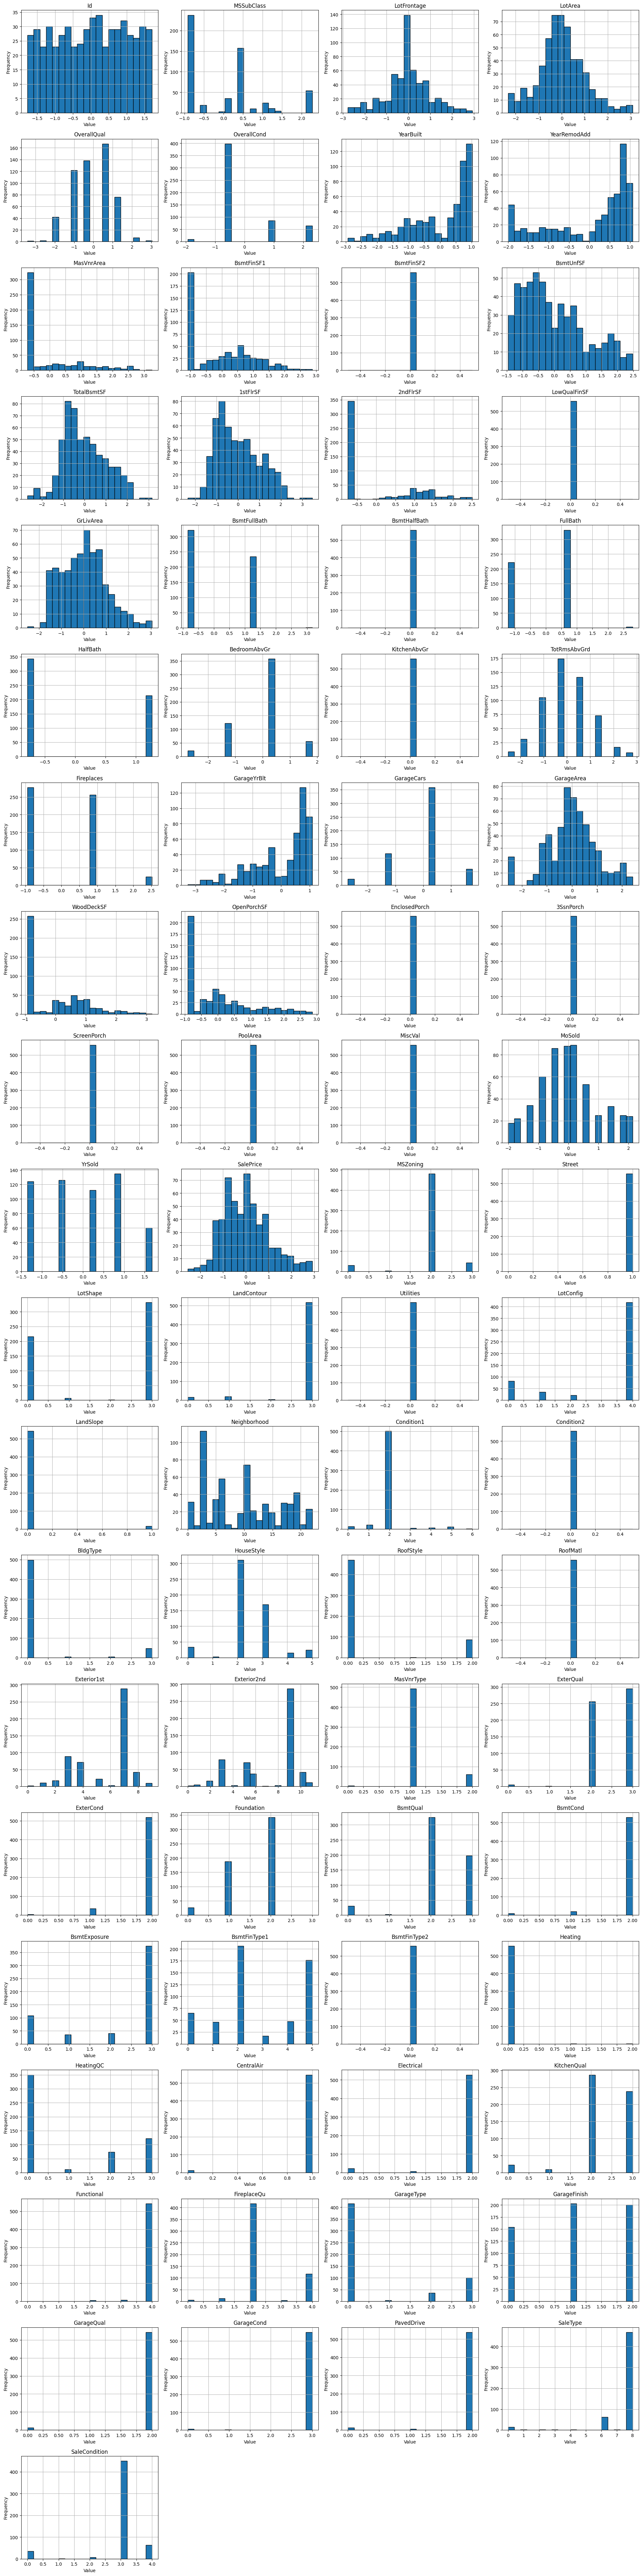

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Memeriksa jumlah nilai yang hilang di setiap kolom
train = pd.read_csv("content/train.csv")
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

missing_values = train.isnull().sum()
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

category_features = df.select_dtypes(include=['object']).columns
df[category_features]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
   df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols) # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
   df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
   axes[i].set_title(column)
   axes[i].set_xlabel('Value')
   axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
   fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

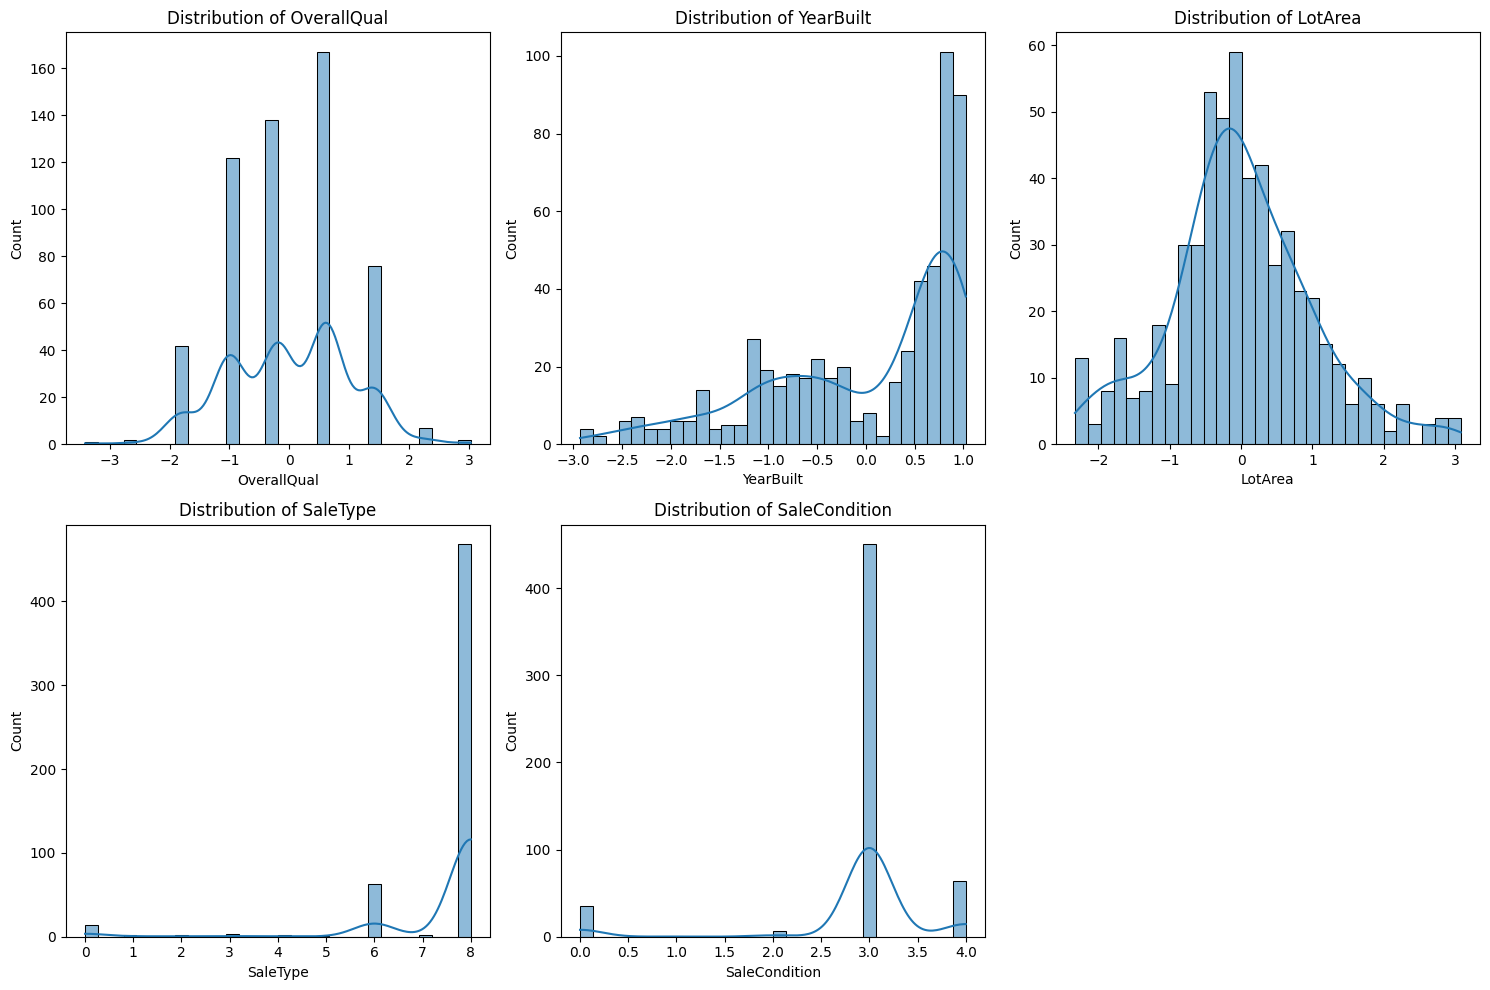

In [7]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

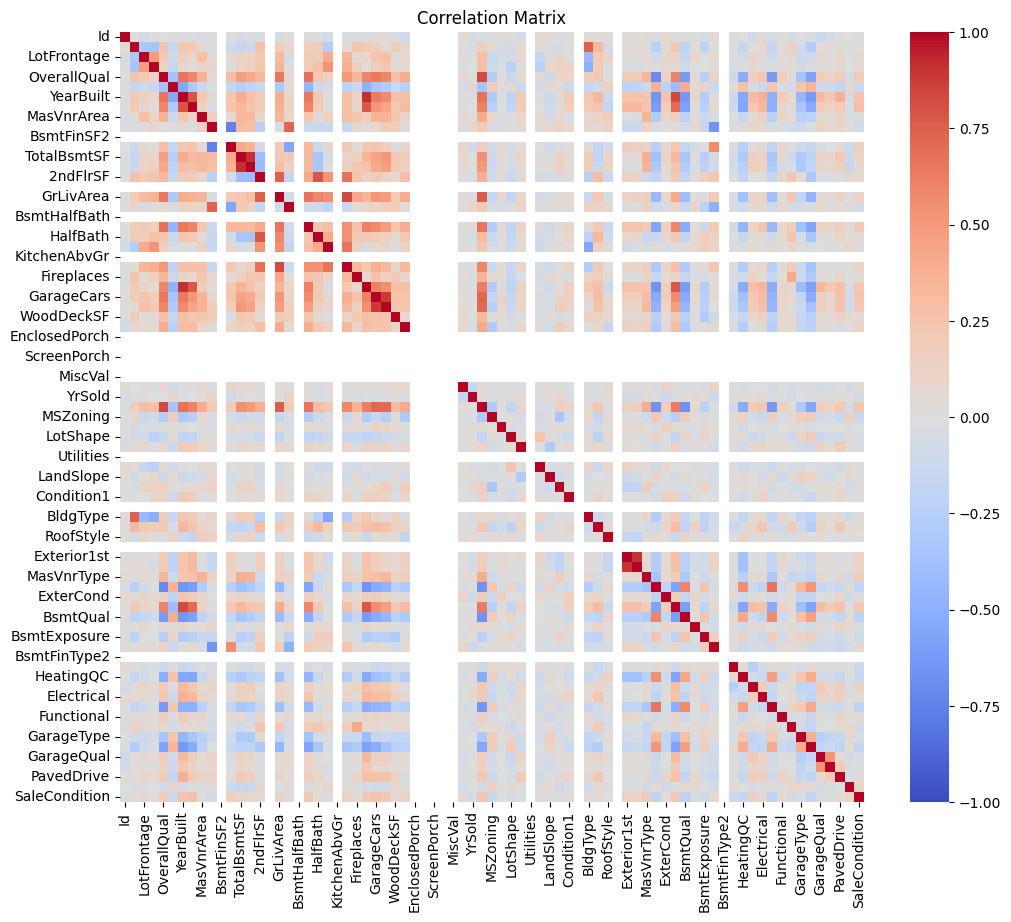

In [8]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

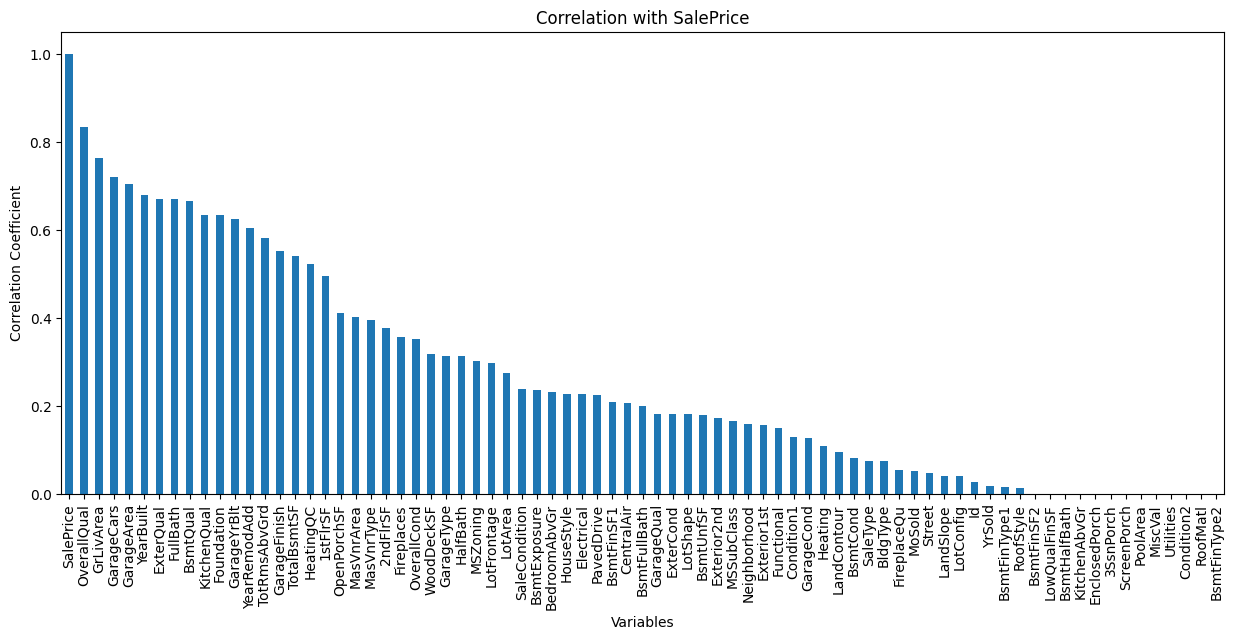

In [9]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()